# Uygulama Notları: 5.5 + π
## FİZ220 - Bilgisayar Programlama II | 05/06/2020

**Lineer Cebir Uygulamaları & Grafik Çizimi (II)**

* 3\. Yaylar ve <strike>insanlar</strike> kütleler
   * Nedir bizim sorunumuz?
   * Diagonalize this!..
   * Yaylar (Rebooted)
     * Ödev #4
   * Dipten ve derinden
   * Normal Koordinatlar / Modlar
   * Hız analizi
   * Grafikler
   * Asıl Grafikler, Simülasyon, vs.
   
   
Dr. Emre S. Taşcı, emre.tasci@hacettepe.edu.tr  
Fizik Mühendisliği Bölümü  
Hacettepe Üniversitesi

# 3. Yaylar ve <strike>insanlar</strike> kütleler
**(Nihayet!)**

Açılışı büyük yapıp, üç yay ve iki kütleden oluşan aşağıdaki şeklin normal modlarını bulacağız:


Simetrik ve anlaşılır sonuçlar çıksın diye, bir de pek çok diatomik molekülü modelleyebiliyor diye birbirlerine $K$, duvarlara $k$ yay sabitli yaylarla bağlanmış, eşit $m$ kütleli iki cismin hareketini inceleyeceğiz.

* 1. cismi (soldaki) sağa doğru $x_1$ kadar,
* 2. cismi (sağdaki) sağa doğru $x_2$ kadar 

çektiğimizi düşünüp, Hooke yasasından kuvvetleri bulup, bunu Newton'ın 2. yasasına girelim (gerçek hayatlarında Newton ve Hooke birbirleri ile kanlı bıçaklılarmış):

<u>1. cismin hareket denklemi</u>  
$-kx_1-K(x_1 - x_2) = m\ddot{x}_1$

<u>2. cismin hareket denklemi</u>  
$-kx_2-K(x_2 - x_1) = m\ddot{x}_2$

Bu denklemleri matris çarpımı ile gösterirsek:

$$\begin{pmatrix}-(k+K)&K\\K&-(k+K)\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix} =
m\begin{pmatrix}\ddot{x}_1\\\ddot{x}_2\end{pmatrix}$$

Sol tarafta yerdeğiştirme vektörü, sağ tarafta ise ivme vektörü var. Neredeyse özdeğer denklemi çıkacakmış gibi görünüyor. Kafamızı kullanıp, şansımızı deneyelim: bunlar yay olduğundan, soruda da sürtünme vs. dış etkenden bahsedilmediğinden, peryodik hareket yapacaklarını varsayalım, yani:

$$x_i(t) = A_i\,\cos(\omega t + \phi)$$

formunda salınsınlar. Bu durumda zamana göre iki kere türev aldığımızda:

$$\ddot{x}_i(t) = -\omega^2 A_i\,\cos(\omega t + \phi) = -\omega^2 x_i(t)$$

çıkar ki, bunu da üstteki denklemde ivmelerin yerine yerleştirdiğimiz zaman:

$$\begin{pmatrix}-(k+K)&K\\K&-(k+K)\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix} =
-m\omega^2\begin{pmatrix}x_1\\x_2\end{pmatrix}$$ 

şeklinde misler gibi bir özdeğer denklemine dönüştürmüş oluruz (özdeğer denklemi neydi? $A$ bir matris, $\lambda$ da bir skaler olmak üzere: $A\vec{x} = \lambda\vec{x}$).

[Dikkat: $x_i(t) = A_i\,\cos(\omega t + \phi)$ şeklinde bir çözüm olduğunu varsaymak, bu şekilde **sadece 1** çözüm olduğu anlamına gelmez! eğer $A_1\cos(\omega_1 t + \phi_1)$ bir çözümse ve, $A_2\cos(\omega_2 t + \phi_2)$ de bir diğer çözümse, o zaman $A_1\cos(\omega_1 t + \phi_1) + A_2\cos(\omega_2 t + \phi_2)$ de bir çözümdür! (zaten biz de bu şekilde iki çözümün toplamı olarak bulacağız]

## Nedir bizim sorunumuz?
Sorunumuzun pek farkında olmayabiliriz, o yüzden açık açık yazayım: sorunumuz, hareket denklemlerinde iki parametrenin ($x_1 \& x_2$) birbirine dolaşmış olmaları. Keşke her birinin ayrı birer denklemi olsaydı -- o zaman hayat ne kadar kolay olurdu...

Peki "her birinin ayrı birer denklemi olsaydı" ne anlama geliyor? Mesela bu dediğim $3x + 5y =2$ denkleminde mevcut değil ama $3r=7$ & $5t=-3$ gibi denklemlerde mevcut. Böyle yazabilsek zaten sorunu çözdük demek olacak!.. ama nasıl?

Özvektörlerle ilgili konuşurken, "köşegenleştirmekten" bahsetmiştik. Elimizde bir 

$$A=\begin{pmatrix}a_{11}&a_{12}\\a_{21}&a_{22}\end{pmatrix}$$ 

matrisi olsun; eğer bu matrisi uygun $u$ matrisi bulup da, bir "$u^{-1}\cdot A\cdot u = D$" dönüşümü ile 

$$D=\begin{pmatrix}d_{11}&0\\0&d_{22}\end{pmatrix}$$ 

formuna getirebiliyorsak, matrisi köşegenleştirmiş olduğumuzu söyler ve herkesin takdirini kazanırız (neden? çünkü o zaman dolaşık haldeki parametreler yerine, kendilerini dolaşıklıktan kurtarmış daha uygun parametrelerle çalışabiliyoruz -- azzzz sonra. 8)

## Diagonalize this!..
Klasik, gözümüzün nuru:

$$A=\begin{pmatrix}1&2\\3&4\end{pmatrix}$$ 

matrisi ile başlayalım. Gördüğünüz üzere, bu maalesef hiç de köşegen bir matris değil. Onu bir de işe koşalım, örneğin:

$$x+2y = 5\\3x+4y = 7$$ olsun:

$$\begin{pmatrix}1&2\\3&4\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix} =
\begin{pmatrix}5\\7\end{pmatrix}$$

$x$ ve $y$'den daha uygun değişkenler bulup, dolaşıklığı ayırmaya çalışalım -- bunun için $A$'yı köşegenleştireceğiz:

In [10]:
import numpy as np

A = np.array([[1,2],[3,4]])

[l,u] = np.linalg.eig(A)
print(l)
print(u)

D = np.diag(l)
print(D)

print(np.linalg.multi_dot((u,D,np.linalg.inv(u))))

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
[[-0.37228132  0.        ]
 [ 0.          5.37228132]]
[[1. 2.]
 [3. 4.]]


In [17]:
u
u1=u[:,0]
print(u1)
print(np.dot(A,u1))
print(0.30697009/-0.82456484)
print(-0.21062466/0.56576746)

[-0.82456484  0.56576746]
[ 0.30697009 -0.21062466]
-0.3722813235645604
-0.37228132561741883


$$A=\begin{pmatrix}1&2\\3&4\end{pmatrix}$$
$$\lambda_1 = -0.37228132\\
\lambda_2 = 5.37228132$$
$$u_1\begin{pmatrix}-0.82456484\\0.56576746\end{pmatrix}$$
$$A\cdot u_1 = \begin{pmatrix}0.30697009\\-0.21062466\end{pmatrix}=-0.37228132 u_1$$

Müthiş başarı! (Anlatayım:)

$$u = \begin{pmatrix}-0.82456484 & -0.41597356\\0.56576746 & -0.90937671\end{pmatrix}$$

ve 

$$D=\begin{pmatrix}-0.37228132 & 0\\0 & 5.37228132\end{pmatrix}$$

aldığımızda, elimizdeki $A$ matrisini:

$$A = u\cdot D\cdot u^{-1}$$

olarak açabiliyoruz! Bu aynı zamanda şu anlama geliyor, hatırlarsanız elimizde fakir ama gururlu bir:

$$\begin{pmatrix}1&2\\3&4\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix} =
\begin{pmatrix}5\\7\end{pmatrix}$$

lineer denklem seti vardı, temsili olarak $A\cdot\vec{x}=\vec{b}$ şeklinde yazabildiğimiz. Bu durumda, $A$ gördüğümüz yere  $u\cdot D\cdot u^{-1}$ yazalım, nasıl olsa eşdeğerler:

$$u\cdot D\cdot u^{-1} \cdot\vec{x}=\vec{b}$$

Biraz etrafı toparlayalım: $u^{-1} \cdot\vec{x}$ çarpımına $\vec{x}'$ diyelim; bir de denklemin iki tarafını soldan $u^{-1}$ ile çarpalım. Böylelikle şunu elde ederiz:

$$D\cdot\vec{x}'=u^{-1}\vec{b}$$

Son olarak da $u^{-1}\vec{b}$ çarpımına $\vec{b}'$ dersek, denklemimiz:

$$D\cdot\vec{x}'=\vec{b}'$$ 

şeklinde, yeni $x'$ koordinatlarının dolaşık olmadığı kolay bir lokma haline gelir. Bunu 

$$\begin{pmatrix}1&2\\3&4\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix} =
\begin{pmatrix}5\\7\end{pmatrix}$$ 

sistemine uygulayalım:

In [76]:
import numpy as np

A = np.array([[1,2],[3,4]])

[l,u] = np.linalg.eig(A)
u_inv = np.linalg.inv(u)
print(u_inv)
D = np.diag(l)

b = np.array([[5],[7]])
bu = np.dot(u_inv,b)

print(D)
print(bu)

[[-0.92305231  0.42222915]
 [-0.57427572 -0.83696501]]
[[-0.37228132  0.        ]
 [ 0.          5.37228132]]
[[-1.65965752]
 [-8.73013367]]


$$D\cdot \vec{x}' =\vec{b}'$$ 
$$\begin{pmatrix}-0.37228132&0\\0&5.37228132\end{pmatrix}
\begin{pmatrix}x'\\y'\end{pmatrix} =
\begin{pmatrix}-1.65965752\\-8.73013367\end{pmatrix}$$ 


$$-0.37228132x' = -1.65965752$$
$$5.37228132y' = -8.73013367$$

Buradan öğrendiklerimiz: $x' = -0.92305231x + 0.42222915y$ ve $y'=-0.57427572x + -0.83696501y$ olarak iki yeni değişken tanımlarsak, doğrudan: $-0.37228132x' = -1.65965752$ ve $5.37228132y'=-8.73013367$ diye dolaşıksız iki denklemi çat! diye yazabiliriz. Hatta, bölme işlemlerini de yapalım:

In [84]:
xp = (bu[0]/l[0])[0]
yp = (bu[1]/l[1])[0]
print(xp,yp)

4.458073544411625 -1.6250328574428008


$\vec{x}' = u^{-1}\cdot\vec{x}$ ise, $u\cdot \vec{x}' = \vec{x}$ olur:

In [85]:
np.dot(u,np.array([xp,yp]))

array([-3.,  4.])

*Peki bu gerçek hayatta ne işimize yarayacak?..*  
Tebrikler! 10 saat uğraşarak 

$$x+2y = 5\\3x+4y = 7$$ 

için $x=-3,\;y=4$ olduğunu bulduk! 8P

Bana sorsanız 1 dakikada çözerdim... hatta:

In [87]:
np.linalg.solve(np.array([[1,2],[3,4]]),np.array([[5],[7]]))

array([[-3.],
       [ 4.]])

*...e o zaman bu kadar uğraş niye?*

Birazcık daha dikkat ederseniz, denklemlerin dolaşıklığını kaldırdığımızı ve denklem sistemimizi çok daha simetrik ve basit bir forma taşıdığımızı görüyorsunuz. Fizikte bunu çeşitli durumlarda oldukça sıklıkla yapıyoruz (en ünlülerinden biri de n-adet birbirine dolaşık elektronun Schrödinger denklemini n-adet bağımsız elektron denklemine yakınsayarak sayısal çözüm sunan yoğunluk fonksiyonel teorisi (*Density Functional Theory - DFT *).

O burun kıvırmakta olduğumuz $x'$ ve $y'$ yeni değişkenleri de karmaşıklıktan ötürü göremediğimiz simetrileri fark etmemizi sağlıyor: böylelikle çok karmaşık görünen davranışları birbirinden ayrılabilir basit davranışlar şeklinde yazabiliyoruz. Örnek olarak eğik atış problemini düşünün -- $x$ ve $y$ parametrelerinin dolaşık durumunda:

$$y = \tan\theta\, x - \frac{gx^2}{2V_0^2\cos^2\theta}$$

ile boğuşmak yerine (kaldı ki, o da aslında parabol denklemi, çok daha karışık olabilirdi):

$$y = V_0\sin\theta\, t - \frac{1}{2}gt^2\\
x = V_0\cos\theta\, t$$

denklemleri ile sanki bir topu yatayda, bir diğerini düşeyde atmışız gibi ayrı ayrı inceleyebiliyoruz. (Asıl bomba birazdan geliyor ;)

... biz yaylarımıza dönelim:

# Yaylar (Rebooted)


$$\begin{pmatrix}-(k+K)&K\\K&-(k+K)\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix} =
-m\omega^2\begin{pmatrix}x_1\\x_2\end{pmatrix}$$ 

Haydi dolaşıklığı kaldıralım (bunun için sayısal değerlere yaslanacağım):

In [18]:
import numpy as np

m = 1 # kg
k = 10 # N/m
K = 30 # N/m

A = np.array([[-(k+K),K],[K,-(k+K)]])
print(A)

[l,u] = np.linalg.eig(A)
u_inv = np.linalg.inv(u)
D = np.diag(l)

print(l)
print(D)
print(u)

[[-40  30]
 [ 30 -40]]
[-10. -70.]
[[-10.   0.]
 [  0. -70.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


İki tane özdeğerimiz var: $\lambda_1=-10$ ve $\lambda_2=-70$ (Sayısal değil de, analitik çözersek bunların $\lambda_1 = -k$ ile $\lambda_2 = -(k+2K)$ olduğunu fark ederiz ;). 

İki tane de özvektörümüz var, sırası ile: 

$$\vec{u}_1=\begin{pmatrix}\sqrt{2}/2\\\sqrt{2}/2\end{pmatrix} \quad \text{ve} \quad\vec{u}_2\begin{pmatrix}-\sqrt{2}/2\\\sqrt{2}/2\end{pmatrix}$$

(özvektörleri istediğiniz herhangi bir sayıyla çarpabilirsiniz, özellikleri değişmez (neden?). Burada $\sqrt{2}/2$ değerlerinin alınma sebebi, özvektörlerin boylarının 1'e normalize edilmiş olmasındandır).

Tanımları itibarı ile de:
$$A\vec{u}_i = \lambda_i\vec{u}_i$$
eşitliğini sağlarlar.

### Ödev #4
Yaylar için tanımladığımız $A$ matrisi için gerçekten de yukarıdaki özdeğer denklemlerinin sağlandığını teyit edin.

**Bonus:** Soruya ait A matrisini, özvektörler matrisinden ve köşegenleştirilmiş formu kullanarak geri üretin.

## Dipten ve derinden
$$A\vec{x}=-m\omega^2\vec{x}$$
aynı zamanda:
$$A\vec{u}_i=\lambda_i\vec{u}_i$$ olduğuna göre:

* $\vec{u}_1$ için: $\vec{x} = \vec{u}_1$ ve $\lambda_1 = -k = -10  = -m\omega^2$ olur. Buradan da:

$$\vec{x} = \begin{pmatrix}x_1\\x_2\end{pmatrix} = \begin{pmatrix}\sqrt{2}/2\\\sqrt{2}/2\end{pmatrix}$$

$$\omega = \sqrt{k/m} = \sqrt{10/m}$$

Özvektörü herhangi bir sayıyla çarpabileceğimizden dolayı, bu özvektörün bize söylediği, $x_1$ ve $x_2$'nin birbirlerine hep eşit olduğudur. Özdeğerden bulduğumuz da, başta $x_i(t) = A_i\cos(\omega t+\phi)$ yazarken varsaydığımız frekans olmakta. Yani, 1. özdeğer denkleminden elimize geçen:

$$ x_1(t) = x_2(t) = A_I\cos(\omega_I t + \phi_I),\quad\omega_I = \sqrt{k/m}$$

* $\vec{u}_2$ için: $\vec{x} = \vec{u}_2$ ve $\lambda_2 = -(k+2K) = -70  = -m\omega^2$ olur. Buradan da:

$$\vec{x} = \begin{pmatrix}x_1\\x_2\end{pmatrix} = \begin{pmatrix}-\sqrt{2}/2\\\sqrt{2}/2\end{pmatrix}$$

yani, $x_1$ ve $x_2$'nin eşit büyüklükte fakat zıt yönlere gittikleridir. Frekansları da:

$$\omega = \sqrt{(k+2K)/m} = \sqrt{70/m}$$

olup, özetle:

$$ x_1(t) = -x_2(t) = A_{II}\cos(\omega_{II} t + \phi_{II}),\quad\omega_{II} = \sqrt{(k+2K)/m}$$

olur.

## Normal Koordinatlar / Modlar
Normal koordinatları da $A$'nın köşegenleştirilmiş halinden bulabiliriz (spoiler: önceki bölümden sonra çok şaşırtıcı bir şey çıkmayacak 8)

$$\begin{align*}
A\cdot\vec{x} &= -m\omega^2\vec{x}\\
u\cdot D \cdot u^{-1} \vec{x} &= -m\omega^2\vec{x}\\
D \cdot \vec{x}' &= -m\omega^2 u^{-1}\cdot\vec{x}\\
D \cdot \vec{x}' &= -m\omega^2 \cdot\vec{x}'
\end{align*}
$$

In [93]:
import numpy as np

m = 1 # kg
k = 10 # N/m
K = 30 # N/m

A = np.array([[-(k+K),K],[K,-(k+K)]])

[l,u] = np.linalg.eig(A)
u_inv = np.linalg.inv(u)
D = np.diag(l)

print(l)
print(D)
print(u_inv)

[-10. -70.]
[[-10.   0.]
 [  0. -70.]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Yani:

$$\begin{align*}
u^{-1}\vec{x} &= \vec{x'}\\
\rightarrow \begin{pmatrix}\frac{\sqrt{2}}{2}&\frac{\sqrt{2}}{2}\\
-\frac{\sqrt{2}}{2}&\frac{\sqrt{2}}{2}
\end{pmatrix}
\begin{pmatrix}{x_1\\x_2}\end{pmatrix}
&=
\begin{pmatrix}{x'_1\\x'_2}\end{pmatrix}
\end{align*}
$$

Herhangi bir sayıyla çarpsak da bir şey değişmeyeceğinden:

$$x'_1 = \frac{x_1 + x_2}{2}, \quad \omega=\sqrt{k/m}$$

$$x'_2 = \frac{x_1 - x_2}{2}, \quad \omega=\sqrt{(k+2K)/m}$$

Birinci normal koordinat (/mod) iki cismin de aralarındaki yayı sıkıştırıp/germeden, aynı yönlere gitmelerini temsil ediyordu, formülüne bakacak olursak, bunun ağırlık merkezinin hareketini temsil ettiğini görürüz.

İkinci mod ise, iki cismin zıt yönlere gittiği durumdu. Bunda da biri üzerine odaklandığımız durumu normal koordinat olarak alabiliriz.

Modları birleştirerek de parçacıkların hareketlerini çözmüş oluruz:

$$x_1(t) = A_I\cos(\omega_I t+\phi_I) + A_{II}\cos(\omega_{II} t+\phi_{II})\\
x_2(t) = A_I\cos(\omega_I t+\phi_I) - A_{II}\cos(\omega_{II} t+\phi_{II})$$

$$\begin{pmatrix}x_1\\x_2\end{pmatrix} = A_I\begin{pmatrix}1\\1\end{pmatrix}\cos(\omega_I t+\phi_I) + A_{II}\begin{pmatrix}1\\-1\end{pmatrix}\cos(\omega_{II} t+\phi_{II})$$

**Not:**
$$\begin{pmatrix}x_1\\x_2\end{pmatrix} = A_I\begin{pmatrix}3\\2\end{pmatrix}\cos(\omega_I t+\phi_I) + A_{II}\begin{pmatrix}1\\-5\end{pmatrix}\cos(\omega_{II} t+\phi_{II})$$

Şeklindeki bir çözümün normal koordinatları: I modu için: $5x + y$; II modu için $2x-3y$ olur.


### "Lisedeyken trigonometri en sevdiğim konuydu.." (*aka: Yalandan kim ölmüş*)
("Şayet çok istersek") Yukarıdaki formülümüzü trigonometrik eşitlikleri *-ve güzel fiziğimizi-* kullanarak açıp, başka bir form haline getirebiliriz:

$$\boxed{\cos(\alpha\pm\beta) = \cos\alpha\,\cos\beta\mp\sin\alpha\,\sin\beta}$$

O halde (derin bir nefes...):

$$\begin{align*}x_1(t) &= A_I\cos(\omega_I t+\phi_I) + A_{II}\cos(\omega_{II} t+\phi_{II})\\
&=A_I\left[\cos\left(\omega_I t\right)\cos\phi_I -\sin\left(\omega_I t\right)\sin\phi_I \right]
\\&+A_{II}\left[\cos\left(\omega_{II} t\right)\cos\phi_{II} -\sin\left(\omega_{II} t\right)\sin\phi_{II} \right]\\
\\
x_2(t) &= A_I\cos(\omega_I t+\phi_I) - A_{II}\cos(\omega_{II} t+\phi_{II})\\
&=A_I\left[\cos\left(\omega_I t\right)\cos\phi_I -\sin\left(\omega_I t\right)\sin\phi_I \right]
\\&-A_{II}\left[\cos\left(\omega_{II} t\right)\cos\phi_{II} -\sin\left(\omega_{II} t\right)\sin\phi_{II} \right]
\end{align*}$$

Aklımızda şöyle bir form var:
$$x_1(t) = a\cos\left(\omega_{I} t\right) + b\sin\left(\omega_I t\right) + c \cos\left(\omega_{II} t\right)+d\sin\left(\omega_{II} t\right)\\
x_2(t) = a\cos\left(\omega_{I} t\right) + b\sin\left(\omega_I t\right) - c \cos\left(\omega_{II} t\right)-d\sin\left(\omega_{II} t\right)
$$

(bu formun da uygun olduğunu nereden biliyoruz? Cevap: hareket denklemine beslediğimizde sağlıyorlar, oradan (-sayısal olarak- denemesi bedava!) ;)

Özel durumlarda üstteki açılımlarla alttaki açılımları kesiştirip, bilmediğimiz $a,b,c,d$ katsayılarını bildiğimiz katsayılar cinsinden tanımlayabiliriz:

$$\begin{alignat*}{3}t=0,\,\omega_{II}=0:&\quad x_1(0)&&=A_I\cos\phi_I = a\\
t=0,\,\omega_{I}=0:&\quad x_1(0)&&=A_{II}\cos\phi_{II} = c\\
t=\frac{\pi/2}{\omega_{I}},\,\omega_{II}=0:&\quad x_1\left(\frac{\pi/2}{\omega_{I}}\right) &&= -A_{I}\sin\phi_{I} = b\\
t=\frac{\pi/2}{\omega_{II}},\,\omega_{I}=0:&\quad x_1\left(\frac{\pi/2}{\omega_{II}}\right) &&= -A_{II}\sin\phi_{II} = d
\end{alignat*}
$$

## Hız analizi
Frekanslarına bakarak, zıt hareket modunun aynı yöne hareket modundan daha hızlı şekilde ilerlediğini görüyoruz.

## Grafikler
Birinci mod $\omega_I$ frekansıyla, ikinci mod da $\omega_{II}$ frekansıyla salınacak, onları yay sabitlerinden buluruz. $a,b,c,d$ katsayıları ise aslında başlangıç koşullarının ta kendisi:
* $a,c$ : Başlangıçta, sırasıyla, 1. ve 2. kütlenin ne kadar çekildiği
* $b,d$ : Başlangıçta, sırasıyla, 1. ve 2. kütlelerin hızı

a,c:  1.5 -1.5
b,d:  0.0 -0.0


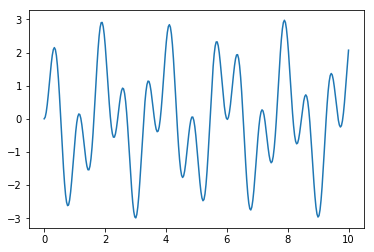

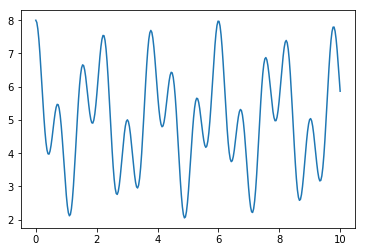

In [21]:
import numpy as np
import matplotlib.pyplot as plt

k=10 # N/m
K=30 # N/m

m = 1 # kg

x1_0 = 0 # m
x2_0 = 3 # m
v1_0 = 0 # m/s
v2_0 = 0 # m/s

x2_rel_to_x1 = 5

w_I = np.sqrt(k/m)
w_II = np.sqrt(k+2*K/m)

Omega = (w_II+w_I)/2
Epsilon = (w_II-w_I)/2

N = 300
t=np.linspace(0,10,N)

M_ac = np.array([[1, 1],[1,-1]])
x1x2_0 = np.array([[x1_0],[x2_0]])
a,c = np.linalg.solve(M_ac,x1x2_0).flatten()
print("a,c: ",a,c)

M_bd = np.array([[w_I, w_II],[w_I,-w_II]])
v1v2_0 = np.array([[v1_0],[v2_0]])
b,d = np.linalg.solve(M_bd,v1v2_0).flatten()
print("b,d: ",b,d)

x1 = a*np.cos(w_I*t) + b*np.sin(w_I*t) + c*np.cos(w_II*t) + d*np.sin(w_II*t)
x2 = x2_rel_to_x1+a*np.cos(w_I*t) + b*np.sin(w_I*t) - c*np.cos(w_II*t) - d*np.sin(w_II*t)

plt.plot(t,x1)
plt.show()

plt.plot(t,x2)
plt.show()

#fig,(ax1,ax2) = plt.subplots(2,1)
#ax1.plot(t,x1)
##ax1.plot(t,x1,t,np.max(x1)*np.sin(Epsilon*t))
#ax1.set_title("1. Kütle")
#ax2.plot(t,x2)
##ax2.plot(t,x2,t,x2_rel_to_x1+(np.max(x2)-x2_rel_to_x1)*np.cos(Epsilon*t))
#ax2.set_title("2. Kütle")
#plt.show()

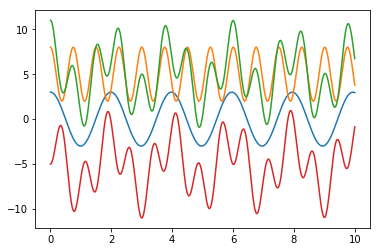

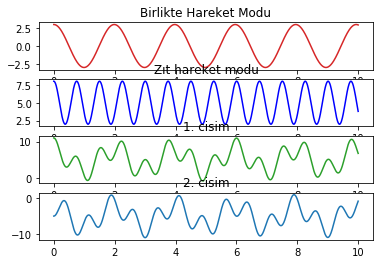

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m = 1 # kg
k = 10 # N/m
K = 30 # N/m

omega1 = np.sqrt(k/m)
omega2 = np.sqrt((k+2*K)/m)

A1 = 3
A2 = 3
x2_0_x1_0a_gore = 5

t = np.linspace(0,10,1000)
x1p = A1*np.cos(omega1*t)
x2p = x2_0_x1_0a_gore+A2*np.cos(omega2*t)

x1 = x1p+x2p
x2 = x1p-x2p

plt.plot(t,x1p,t,x2p,t,x1,t,x2)
plt.show()

fig,axs = plt.subplots(4)
axs[0].plot(t,x1p,"tab:red")
axs[0].set_title("Birlikte Hareket Modu")
axs[1].plot(t,x2p,"b-")
axs[1].set_title("Zıt hareket modu")
axs[2].plot(t,x1,"tab:green")
axs[2].set_title("1. cisim")
axs[3].plot(t,x2)
axs[3].set_title("2. cisim")
plt.show()

# Asıl Grafikler, Simülasyon, vs.
Hareketli simülasyonumuzu çizgi-film mantığıyla, ekran üzerinde peş peşe grafikleri yenileyerek gerçekleştirdiğimizden, Jupyter bu iş için pek uygun değil (burada yapacak olursak alt alta çizecek); bu nedenle, aşağıdaki kodu burada çalıştırmak yerine bir başka Python yorumlayıcısında (tavsiyem: Spyder) çalıştırmanızı tavsiye ederim.

Yanlışlıkla Jupyter içinde çalıştırılırsa diye adım sayısı olan $N$'i 3 yaptım, sizler onu 30+ keyfinizce bir değer yapmayı unutmayın! 8)

a,c:  1.0 -2.0
b,d:  0.0 -0.0


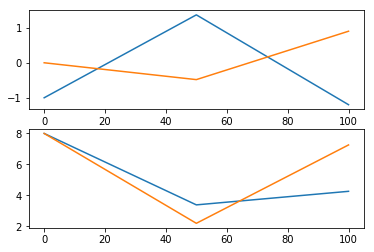

devam?..


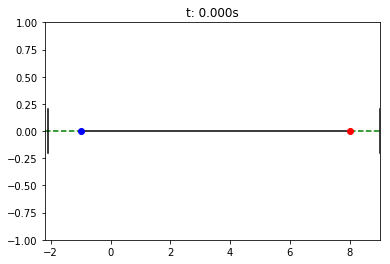

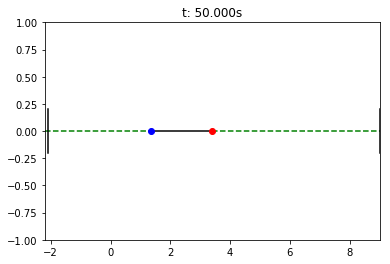

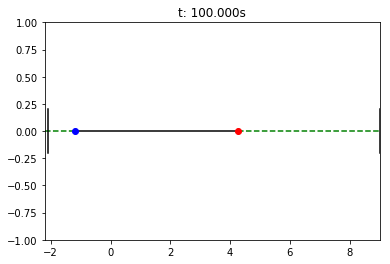

In [2]:
"""
Created on Fri Jun  5 00:42:30 2020
Simulation of two masses connected via springs
FIZ220 - https://emresururi.github.io/FIZ220/

Filename: springsMasses.py
@author: sururi
"""

import numpy as np
import matplotlib.pyplot as plt

k=50 # N/m
K=1 # N/m

m = 1 # kg

x1_0 = -1 # m
x2_0 = 3 # m
v1_0 = 0 # m/s
v2_0 = 0 # m/s

x2_rel_to_x1 = 5

w_s = np.sqrt(k/m)
w_f = np.sqrt((k+2*K)/m)

Omega = (w_f+w_s)/2
Epsilon = (w_f-w_s)/2

N = 3
t=np.linspace(0,100,N)

M_ac = np.array([[1, 1],[1,-1]])
x1x2_0 = np.array([[x1_0],[x2_0]])
a,c = np.linalg.solve(M_ac,x1x2_0).flatten()
print("a,c: ",a,c)

M_bd = np.array([[w_s, w_f],[w_s,-w_f]])
v1v2_0 = np.array([[v1_0],[v2_0]])
b,d = np.linalg.solve(M_bd,v1v2_0).flatten()
print("b,d: ",b,d)

x1 = a*np.cos(w_s*t) + b*np.sin(w_s*t) + c*np.cos(w_f*t) + d*np.sin(w_f*t)
x2 = x2_rel_to_x1+a*np.cos(w_s*t) + b*np.sin(w_s*t) - c*np.cos(w_f*t) - d*np.sin(w_f*t)

fig,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(t,x1,t,np.max(x1)*np.sin(Epsilon*t))
ax2.plot(t,x2,t,x2_rel_to_x1+(np.max(x2)-x2_rel_to_x1)*np.cos(Epsilon*t))
plt.show()
input("devam?..")

minmin = np.min(x1)-1
maxmax = np.max(x2)+1
for step in np.arange(N):
    plt.clf()
    plt.plot([x1[step],x2[step]],[0,0],"k-")
    plt.plot([minmin,x1[step]],[0,0],"g--")
    plt.plot([x2[step],maxmax],[0,0],"g--")
    plt.plot([minmin+0.1,minmin+0.1],[-0.2,0.2],"k-")
    plt.plot([maxmax,maxmax],[-0.2,0.2],"k-")
    plt.plot(x1[step],0,"ob",x2[step],0,"or")
    plt.xlim(minmin,maxmax)
    plt.ylim(-1,1)
    plt.title("t: %.3fs"%(t[step]))
    plt.show()